In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('/Users/anujkawane/Documents/Spring2022/CS649/Assignement1/search.xls', sep='\t', skiprows=[0])

In [12]:
df["Suffix"].fillna("", inplace = True)
df["Course #"] = df["Course #"].astype(str) + df["Suffix"]

MW_Intro = df[(df['Course #'].astype(str).str.startswith('1')) & 
              (df['Days'].astype(str).isin(['M','W','MW']))].groupby('Start Time')['Course #'].apply(list)

TTH_Intro = df[(df['Course #'].astype(str).str.startswith('1')) & 
               (df['Days'].astype(str).isin(['T','TH','TTH']))].groupby('Start Time')['Course #'].apply(list)

MW_Lower = df[(df['Course #'].astype(str).str.startswith(('2','3','4'))) & 
              (df['Days'].astype(str).isin(['M','W','MW']))].groupby('Start Time')['Course #'].apply(list)

TTH_Lower = df[(df['Course #'].astype(str).str.startswith(('2','3','4'))) & 
               (df['Days'].astype(str).isin(['T','TH','TTH']))].groupby('Start Time')['Course #'].apply(list)

MW_Upper = df[(df['Course #'].astype(str).str.startswith(('5','6'))) & 
              (df['Days'].astype(str).isin(['M','W','MW']))].groupby('Start Time')['Course #'].apply(list)

TTH_Upper = df[(df['Course #'].astype(str).str.startswith(('5','6'))) & 
               (df['Days'].astype(str).isin(['T','TH','TTH']))].groupby('Start Time')['Course #'].apply(list)


Schedule = pd.DataFrame({"Intro MW": MW_Intro, "Intro TTH": TTH_Intro, "Lower MW" : MW_Lower, 
                         "Lower TTH" : TTH_Lower,"Upper MW": MW_Upper, "Upper TTH" : TTH_Upper})
Schedule.fillna("")


,Intro MW,Intro TTH,Lower MW,Lower TTH,Upper MW,Upper TTH
Start Time,,,,,,
800.0,,"[150L, 150L, 160L, 160L]",[490],"[210, 496]",,[578]
930.0,,[150],[200],[200],,
1100.0,,"[100, 160L]",,"[480, 496]",,"[549, 581]"
1230.0,,,,[440],,
1400.0,"[150, 160L, 160]",[160],"[370, 490]","[240, 250, 320, 460, 460]","[578, 582, 582]",
1530.0,,"[160L, 160L]",,[320],,
1600.0,[160],[150],"[210, 370, 496]",[480],"[532, 574, 574]","[514, 549]"
1730.0,"[150L, 150L, 160L, 160L, 160]","[150L, 150L]","[460, 490, 490]","[440, 480]","[530, 530, 696, 696]","[596, 596, 605, 649, 649]"
1900.0,,,"[240, 490, 490, 490]",,"[514, 514, 574, 662, 662]","[530, 583]"


    Question 2

In [13]:

courseEnrollment = pd.DataFrame({'Course' : df['Course #'].astype(str) + ' ' + df['Title'], 'Student': df['Total Enrolled']})
courseEnrollment = courseEnrollment.groupby(['Course']).sum().astype(int)
courseEnrollment

,Student
Course,
100 COMPTR SCIENCE PRINCIPLES,38
150 INTRO COMPUTER PROGRAMMNG,175
150L INTRO COMPUTER PROGRM LAB,288
160 INT COMPUTER PROGRAMMING,221
160L INT COMPUTR PROGAMMNG LAB,430
200 INTRO DATA SCIENCE PYTHON,22
210 DATA STRUCTURES,64
240 COMPUTER ORGANIZATION,65
250 INTRO TO SOFTWARE SYSTEMS,57


    Question 3

In [14]:
classessInRoom = df[df['Room'].astype(str).str.isdigit()]
classessInRoom = pd.DataFrame({'Room' : classessInRoom['Building'] + ' ' + classessInRoom['Room'], 'Number of Classes': classessInRoom['Course #'].astype(str) + ' ' + classessInRoom['Title']})
classessInRoom = classessInRoom.groupby(['Room']).count()
classessInRoom

,Number of Classes
Room,
AH 2116,2
AL 101,1
AL 204,1
COM 105,1
COM 207,1
ENS 291,1
GMCS 305,1
GMCS 306,1
GMCS 308,2


    Question 4

In [27]:
classDF = df.copy(deep=True)
classDF = classDF[classDF['Days'].astype(str).isin(['T','TH','TTH'])]

classDF['Start'] = pd.to_datetime(classDF['Start Time'], format='%H%M')
classDF['End'] = pd.to_datetime(classDF['End Time'], format='%H%M')

classDF.index = classDF['Start']
classDF.index = classDF['End']

df_final = classDF.groupby(pd.Grouper(key='Start', freq='5min')).sum()['Total Enrolled'].fillna(0).subtract(ClassDF.groupby(pd.Grouper(key='End', freq='5min')).sum()['Total Enrolled'].fillna(0),fill_value=0).cumsum()
df_final = df_final.to_frame()

df_final = df_final[['Total Enrolled']].reset_index().rename(columns={'index' : 'Start Time','Total Enrolled' : 'Total Students'})
df_final['End Time'] = df_final['Start Time'] + pd.Timedelta(minutes=5)
df_final['Start Time'] = df_final['Start Time'].dt.strftime('%H:%M')
df_final['End Time'] = df_final['End Time'].dt.strftime('%H:%M')
df_final.reindex(columns= ["Start Time", "End Time", "Total Students"])

,Start Time,End Time,Total Students
0,08:00,08:05,191.0
1,08:05,08:10,191.0
2,08:10,08:15,191.0
3,08:15,08:20,191.0
4,08:20,08:25,191.0
5,08:25,08:30,191.0
6,08:30,08:35,191.0
7,08:35,08:40,191.0
8,08:40,08:45,191.0
9,08:45,08:50,191.0


    Question 5

<AxesSubplot:xlabel='Start Time'>

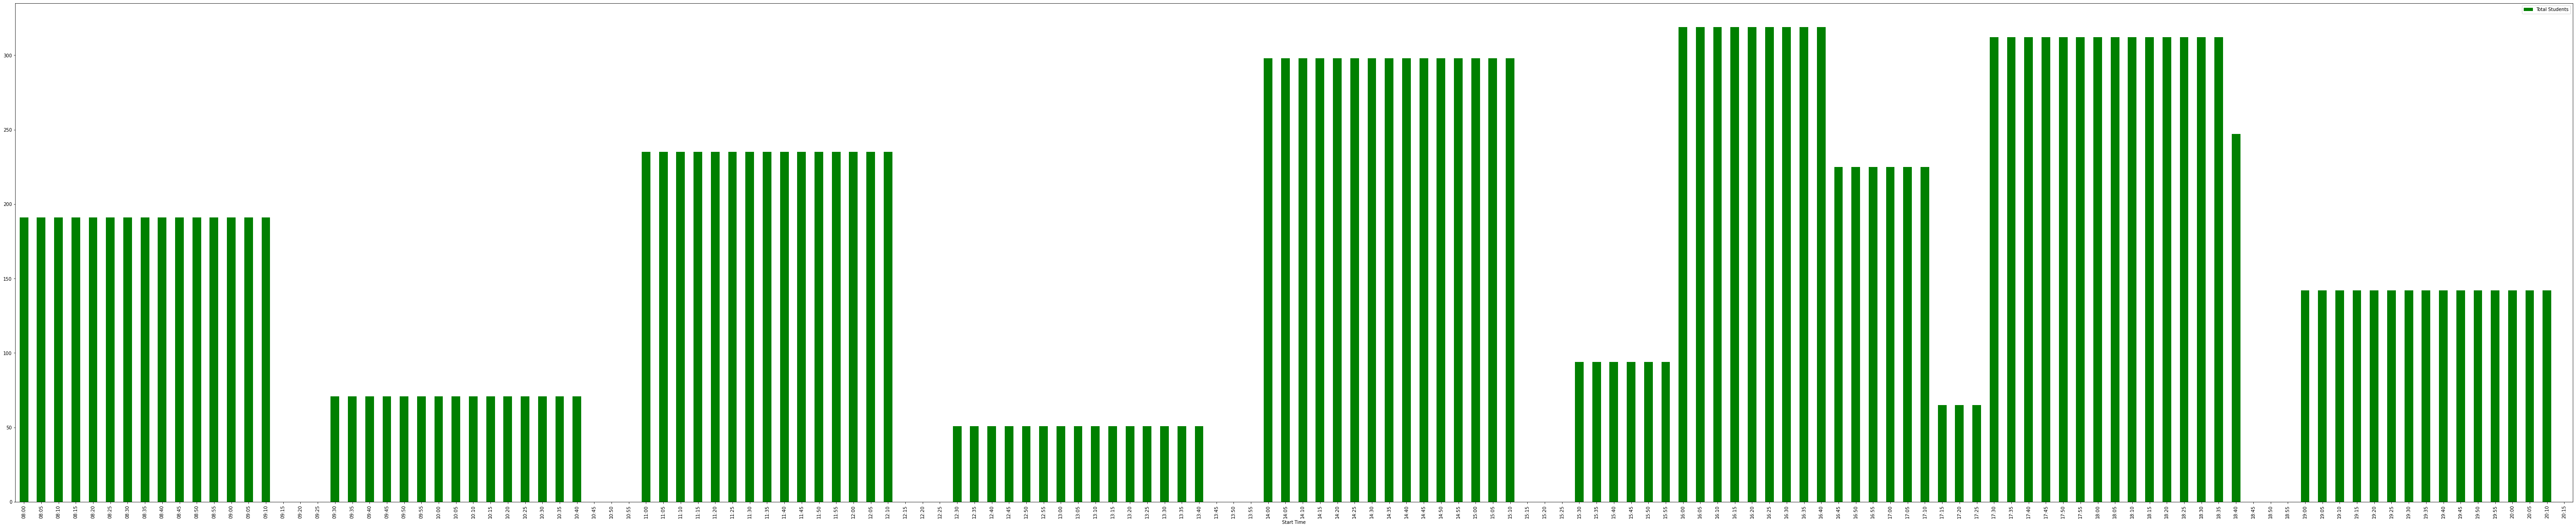

In [28]:
df_final.plot.bar(x = "Start Time", y = "Total Students", figsize=(100,20), color = "green")